# Importe de archivos

In [4]:
import spacy as scy
from google.colab import files
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd


# Seleccionar y cargar un archivo desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Realizar operaciones con el archivo cargado
# ...

# Eliminar el archivo cargado (opcional)
# files.remove(file_name)

Saving OJ.xlsx to OJ (2).xlsx


# Seleccion de datos y preparacion de los datos

In [15]:
data = pd.read_excel('OJ.xlsx')

In [16]:
# a) Dividir el conjunto de datos en entrenamiento (800 observaciones) y prueba (resto)
train_data, test_data = train_test_split(data, train_size=800, random_state=42)

# Variables predictoras y objetivo para los conjuntos de entrenamiento y prueba
X_train = train_data.drop(columns=['Purchase'])
y_train = train_data['Purchase']
X_test = test_data.drop(columns=['Purchase'])
y_test = test_data['Purchase']

In [17]:
from sklearn.preprocessing import LabelEncoder

# Convertir todas las columnas categóricas en numéricas
categorical_columns = X_train.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Primer arbol de decision

In [18]:
# b) Ajustar un árbol de decisión a los datos de entrenamiento
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Generar estadísticas de resumen
training_accuracy = tree_model.score(X_train, y_train)
num_terminal_nodes = tree_model.get_n_leaves()

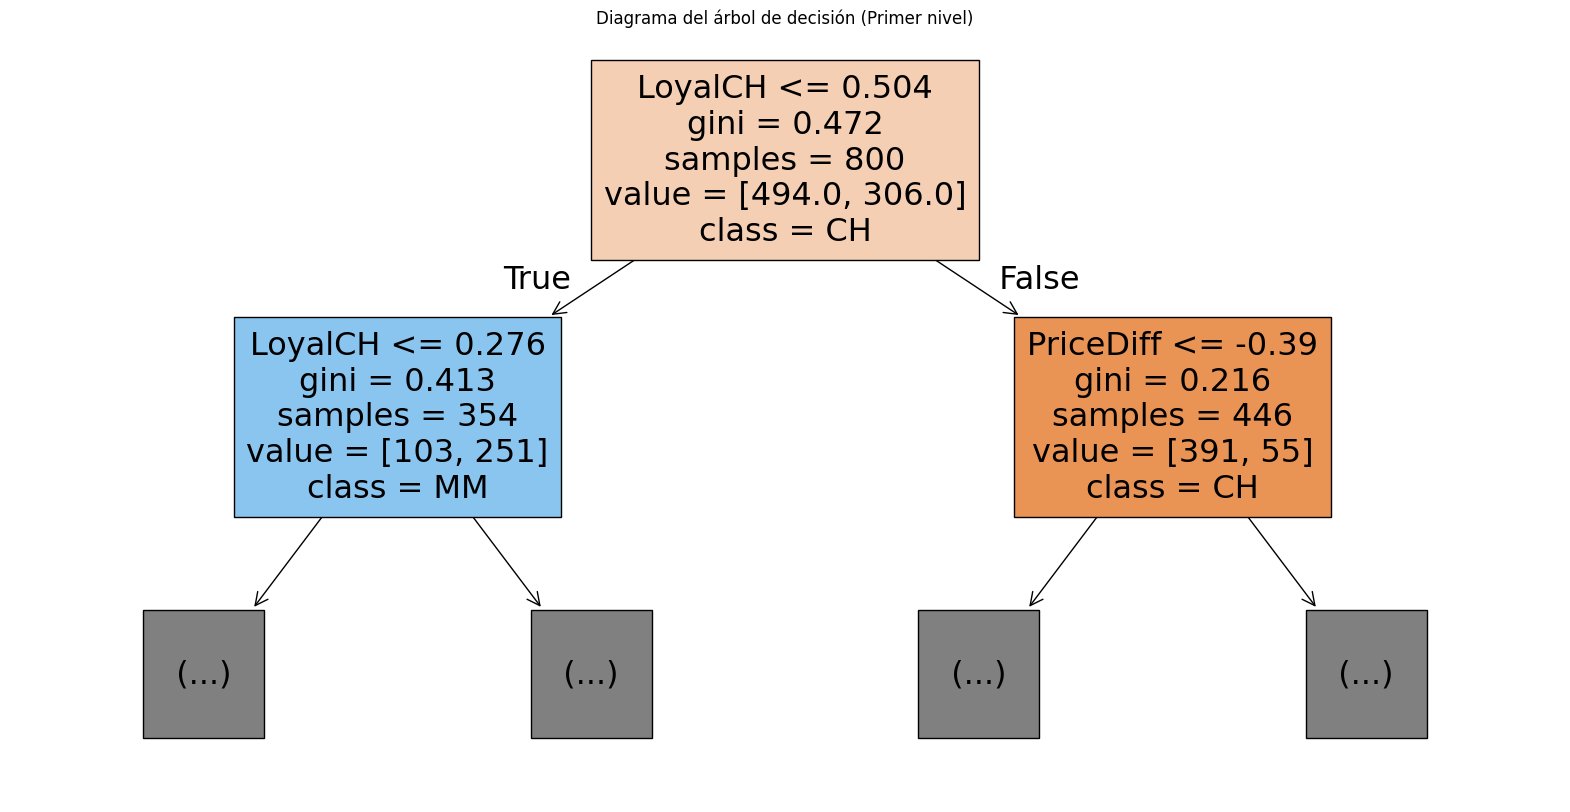

In [20]:
# Corregir la visualización e interpretación del árbol
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=X_train.columns,
    class_names=tree_model.classes_.astype(str),  # Usar clases del modelo
    filled=True,
    max_depth=1  # Mostrar solo el primer nivel para interpretación
)
plt.title("Diagrama del árbol de decisión (Primer nivel)")
plt.show()


# Diagrama completo del arbol de decision

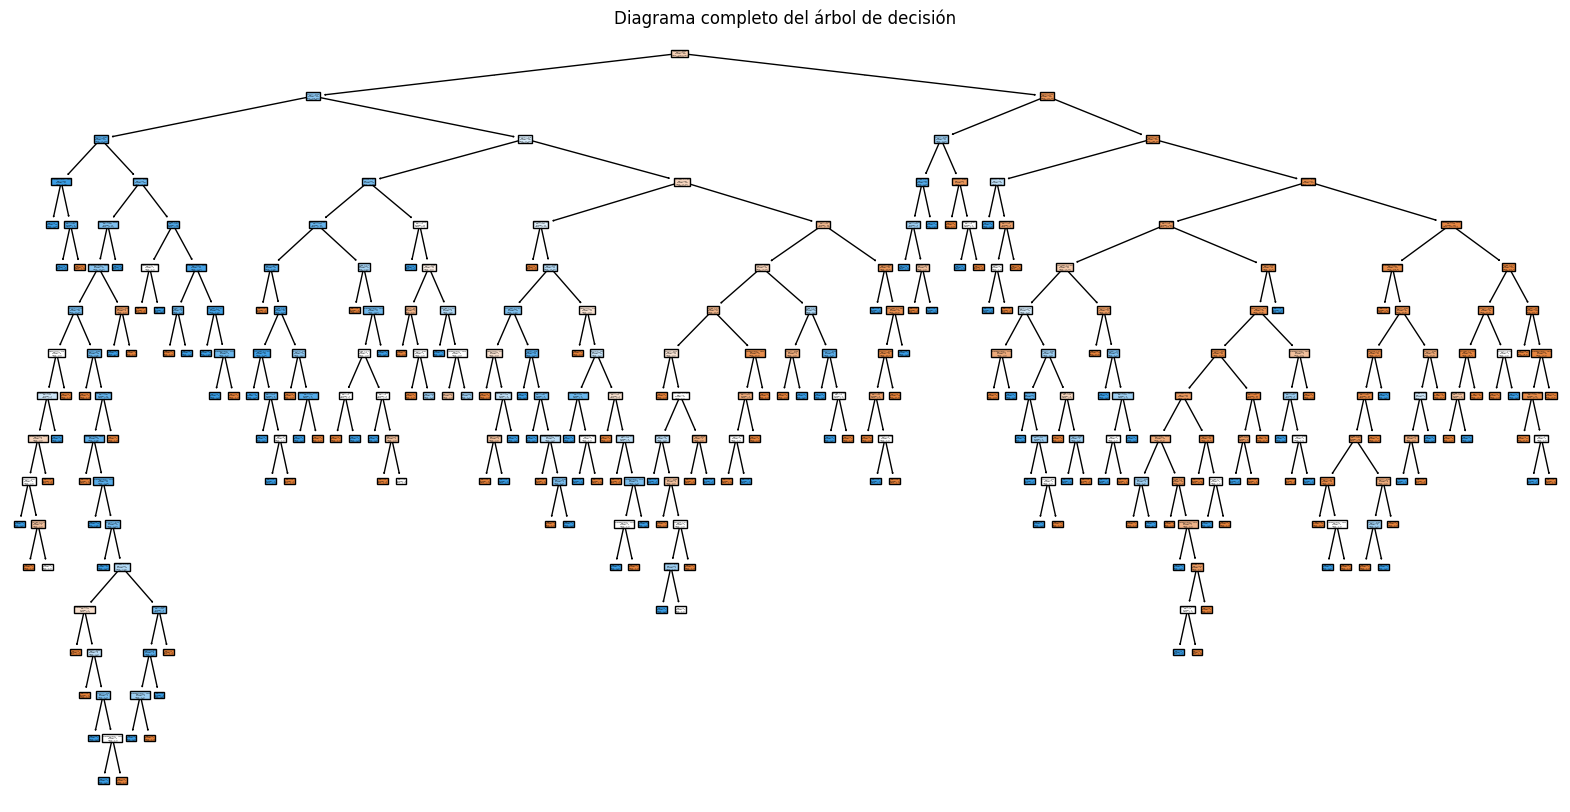

In [22]:
# Generar el diagrama completo del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=X_train.columns,
    class_names=tree_model.classes_.astype(str),  # Usar las clases del modelo
    filled=True
)
plt.title("Diagrama completo del árbol de decisión")
plt.show()


# Evaluacion de la tasa de decision vs el tamaño del arbol

In [23]:

# e) Predicción y matriz de confusión
y_pred_test = tree_model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
test_error_rate = 1 - accuracy_score(y_test, y_pred_test)


In [24]:
# f) Determinar el tamaño óptimo del árbol mediante validación cruzada
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [25]:

# g) Gráfico del tamaño del árbol frente a la tasa de error de validación cruzada
train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(cross_val_score(model, X_train, y_train, cv=5).mean())


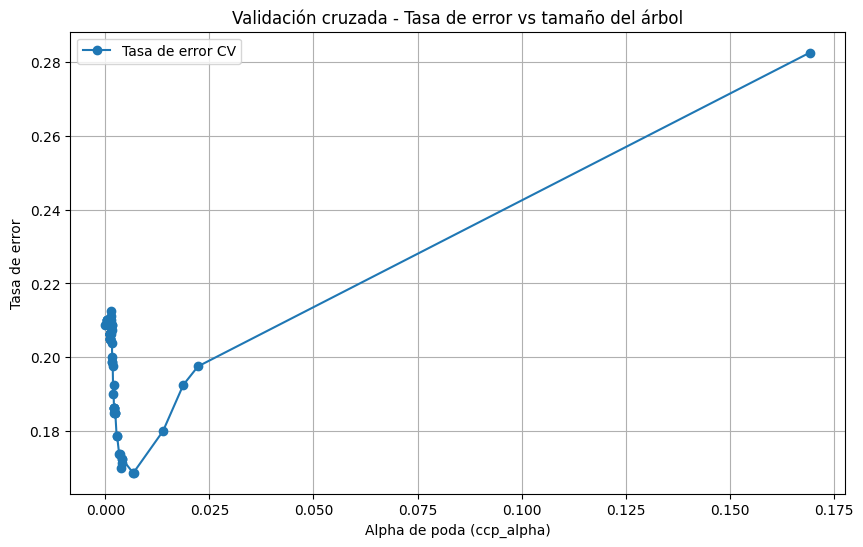

In [26]:

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, 1 - np.array(test_scores), marker='o', label="Tasa de error CV")
plt.xlabel("Alpha de poda (ccp_alpha)")
plt.ylabel("Tasa de error")
plt.title("Validación cruzada - Tasa de error vs tamaño del árbol")
plt.legend()
plt.grid()
plt.show()


# Creacion de un mejor arbol y evaluacion del mismo

In [27]:

# h) Seleccionar el árbol óptimo basado en validación cruzada
optimal_alpha = ccp_alphas[np.argmin(1 - np.array(test_scores))]


In [28]:
# i) Crear un árbol podado con el alpha óptimo
pruned_tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.006597346201628912, random_state=42)

In [29]:
# j) Comparar tasas de error de entrenamiento entre árboles podados y no podados
pruned_training_accuracy = pruned_tree_model.score(X_train, y_train)


In [30]:
# k) Comparar tasas de error de prueba entre árboles podados y no podados
pruned_y_pred_test = pruned_tree_model.predict(X_test)
pruned_test_error_rate = 1 - accuracy_score(y_test, pruned_y_pred_test)


In [31]:
{
    "Training Accuracy (Unpruned)": training_accuracy,
    "Number of Terminal Nodes (Unpruned)": num_terminal_nodes,
    "Test Error Rate (Unpruned)": test_error_rate,
    "Training Accuracy (Pruned)": pruned_training_accuracy,
    "Test Error Rate (Pruned)": pruned_test_error_rate,
    "Optimal Alpha": optimal_alpha
}


{'Training Accuracy (Unpruned)': 0.9925,
 'Number of Terminal Nodes (Unpruned)': 163,
 'Test Error Rate (Unpruned)': 0.2777777777777778,
 'Training Accuracy (Pruned)': 0.84375,
 'Test Error Rate (Pruned)': 0.19259259259259254,
 'Optimal Alpha': 0.006597346201628912}